#Generalization Experiment

In this notebook, you will see the effect of changing a number of factors that affect the generalization power of your ML models. The objective is for you to experiment and change these parameters and observe the effect on the generalization ability of the ML model.

When talking about generalization, many of the important concepts are what I like to call second-degree reality: that means that you don't observe them if you have one instance of a phenomenon, e.g., a single dataset, but rather these are things that you observe if you were to have multiple instances of the same phenomena, e.g., multiple datasets about the same thing. Also, some of these concepts are abstract and can only be shown by contrasting a phenomenon to the assumed underlying truth and we usually don't have access to, nor even verify, that underlying truth. That's why here we work with a synthetic, rather than a real-world  example here: to be able to access the truth as well as generate multiple datasets from the same underlying truth.

For a quick reminder, one of the most important end goals of machine learning (perhaps THE most important goal) is to build models that can generalize...**to yet-unseen data**: A machine learning model is built by making use of a number of examples, often called the learning data. Then, at the end of the learning process, the learning data has been **seen** by the model. Now, if this model performs well on new data that the model has not seen yet, we can say that the model can generalize. In other words, the machine learning model has learned the true patterns that exist both in the learning and new data, **and equally importantly** has NOT learned patterns that are only particular to the learning data and do not exist in new data that the model has not yet seen.

Obviously, if there is no relationship between learning and new data and they can be arbitrarily different from each other, then there is no way, in principle, to perform well on new points and talking about generalization becomes moot. So, it is not a big ask to assume that there is a common underlying truth to both learning and new data points that are coming in if we want to speak about generalization power.

There may be many ways of posing this assumption of 'common underlying truth', and one widespread way to talk about this common underlying truth is that the relationship that exists between features and the label is the same between learning and new data, in particular, there is a mathematical function that maps the features to labels, i.e., a function whose input is feature values and outputs a label.

But then the question will be on why there is a difference between learning and new data? To answer that question we can say two things: First, only a limited number of examples among the possible many appear in either learning or new data, and the examples represented in the new data are different examples than those represented in the learning data. Second, there is a second part to the widespread assumption: That the data that is observed, be it the learning data or new data, is not a direct and exact version of that assumed true relationship but rather a perturbed or *noisy* version of it. So, we have a true relationship, and we have noise, the combination of which makes the data we see.

Then, generalizing means capturing the underlying true relationship and not capturing the peculiarities of the learning data that is the noise.

But again, if this noise is arbitrary, there will be no way to talk about generalization. So, we have to make assumptions about this noise. Most commonly, we assume that this noise, for both learning and new data, is random (and not arbitrary) and comes from the same statistical distribution. We also assume that this noise has a mean of zero (otherwise, it is not merely noise and it is changing (shifting) the relationship).

Also, going back to the assumption that only a limited number of examples among the possible many appear in either learning or new data, we will also assume that the examples are also selected randomly, according to a distribution, which is the distribution data comes from in truth.

With these, we can set up an experiment, in which you can experiment with a number of factors that are involved in the process of learning a machine learning model from a limited number of samples in the learning data and see the effect of the performance of the machine learning model.

The effects are better seen in a regression model, so that is what we go for in this experiment. Also, we restrict ourselves to a learning process that only contains one training process and no validation loops (mind the contrast between learning and training).

The things that you want to change and observe the effect are marked by a `##this` comment at the end of the line of code it is defined in.

The first thing we can experiment with is that true relationship (that we are assuming exists and is a function mapping features to labels). Here, for ease of visualization and measurement, we restrict ourselves to just one feature, i.e., $n=1$. Let's define a relationship `f` that maps from feature values `X[:, `$i$ `]` (for $i$ from $1$ to $n$, but remember we restricted ourselves to $n=1$) to label values. Just note the way the function is defined but leave this relationship be for now, but later in the notebook, we will ask you to come back here and try other relationships and observe the effect of changing the relationship, especially the complexity of it, combined with changing the other factors involved.

In [1]:
n = 1

def f(X):
  x = X[:, 0]
  f = (5 * x) - (2 * np.exp(x)) + (4 * np.sin(x)) ##this
  return f[:, None]

The other factor is the distribution the features are *sampled* from. You don't need to necessarily modify these factors and that's why they are marked by `##optional` rather than `##this`, but feel free to experiment later on and after you've observed the effects of changing the other factors if you feel like it.

In [2]:
def dist_X(mean, sigma, size):
  return np.random.normal(mean, sigma, size) ##optional

mu_X = 0.0 ##optional: this is the mean of the distribution
sigma_X = 1.0 ##optional: this is the variance of the distribution

An exceptionally important factor in the generalization power is the number of examples used in the training process, $m$. After you went through this notebook at least once and saw the results come back here and change `m` and see how the results get affected. change `m` to substantially lower than this start value as well as to substantially higher than this start value and record your observations.

In [3]:
m = 50 ##this

# These are the sizes of training data
# both feature values matrix X as well as the label vector y
size_X = (m, n)
size_y = (m, 1)

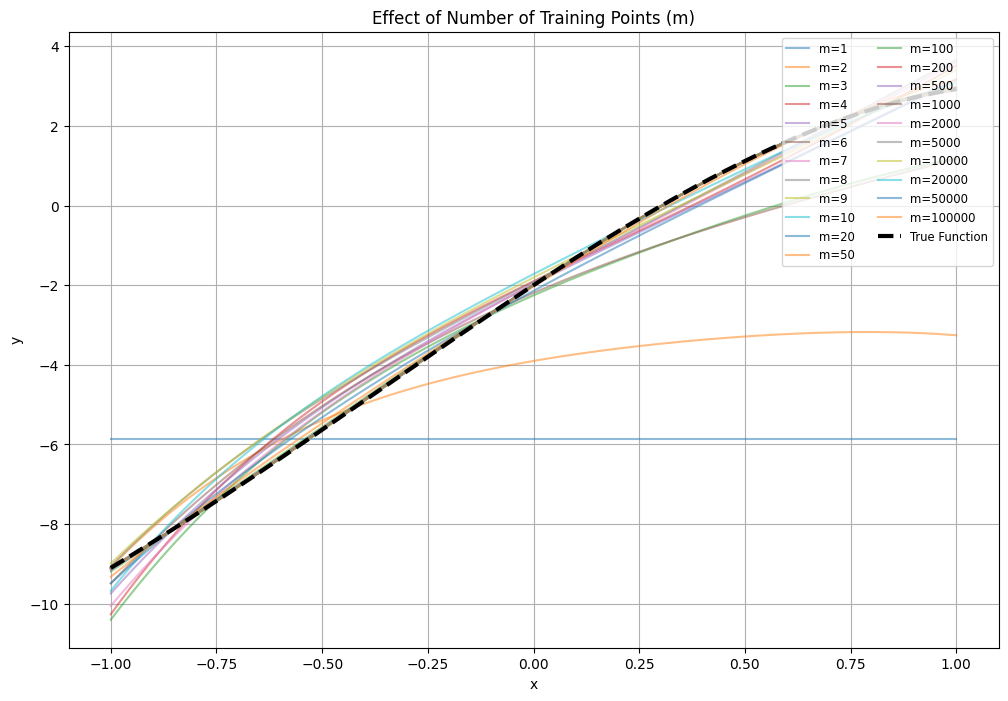

In [17]:
#Changing M values
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Parameters
m_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
sigma_eps = 0.1
model_power = 4
alpha = 0.1

# Generate test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_true = f(x_test).flatten()

# Initialize plot
plt.figure(figsize=(12, 8))

# Iterate over m values
for m in m_values:
    # Generate training data
    X_train = np.random.uniform(-1, 1, (m, 1))
    eps_train = np.random.normal(0, sigma_eps, (m, 1))
    y_train = f(X_train).flatten() + eps_train.flatten()

    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Plot predictions with varied line styles and opacity for better visualization
    plt.plot(x_test[:, 0], y_pred, alpha=0.5, label=f"m={m}")

# Plot the true function
plt.plot(x_test[:, 0], y_true, label="True Function", color="black", linewidth=3, linestyle="--")

# Finalize plot
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.title("Effect of Number of Training Points (m)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


Now, we are ready to *generate* our training data:

In [4]:
import numpy as np

X = dist_X(mu_X, sigma_X, size_X)

Now, let's define the noise that will be added to the true relationship. Later on, you will come back and change this distribution, at least the variance of the noise and record your observation of the results. You can also change the distribution itself (to something other than a normal distribution) if you like to experiment with that but this is optional. Also, note how the distribution is defined, especially the fact that the mean of this distribution is zero.

In [5]:
def dist_eps(sigma, size):
  return np.random.normal(0.0, sigma_eps, size) ##optional

sigma_eps = 1.0 ##this

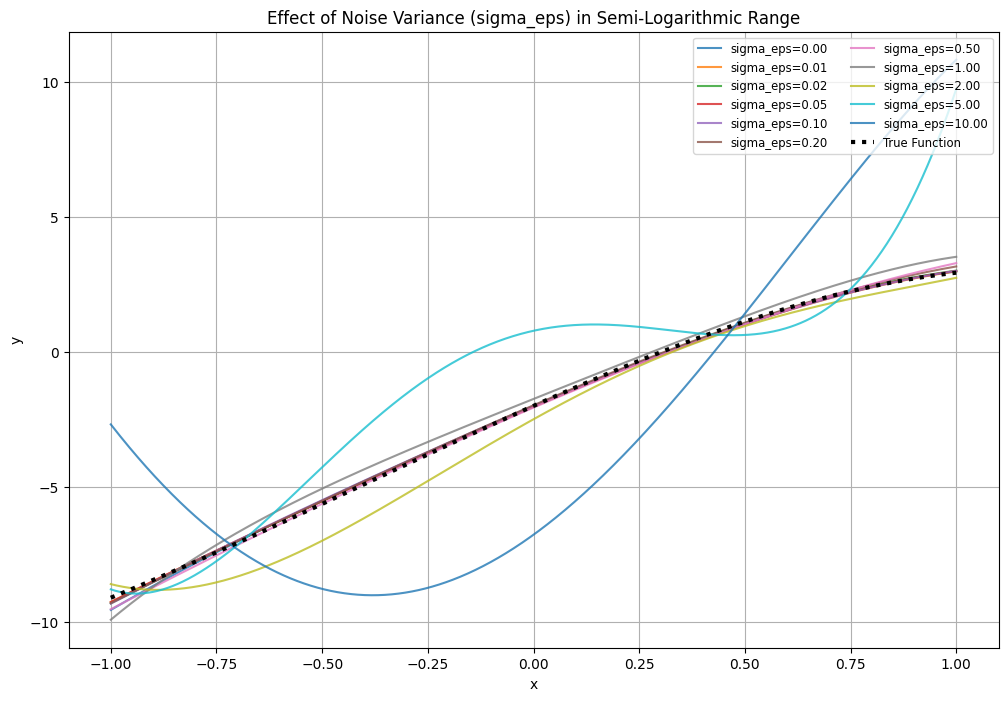

In [18]:
# Changing Sigma_eps
sigma_eps_values = [0.0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
m = 50  # Fixed number of training points
model_power = 4  # Fixed polynomial degree
alpha = 0.1  # Fixed regularization

# Generate test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_true = f(x_test).flatten()

# Initialize plot
plt.figure(figsize=(12, 8))

# Iterate over sigma_eps values
for sigma_eps in sigma_eps_values:
    # Generate training data
    X_train = np.random.uniform(-1, 1, (m, 1))
    eps_train = np.random.normal(0, sigma_eps, (m, 1))
    y_train = f(X_train).flatten() + eps_train.flatten()

    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Plot predictions with unique line styles and alpha for distinction
    plt.plot(x_test[:, 0], y_pred, label=f"sigma_eps={sigma_eps:.2f}", alpha=0.8)

# Plot the true function
plt.plot(x_test[:, 0], y_true, label="True Function", color="black", linewidth=3, linestyle=":")

# Finalize plot
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.title("Effect of Noise Variance (sigma_eps) in Semi-Logarithmic Range")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


Now, we can *generate* labels that are a combination of the true relationship and noise:

In [6]:
eps = dist_eps(sigma_eps, size_y)

y = f(X) + eps

**Note that in real scenarios** we will likely never have access to the true relationship or the shape of the noise (or even a guarantee that this 'true relationship—noise combination' assumption is correct) and we start by having access to only the feature values $\mathbf{X}$ and labels $\mathbf{y}$! What we have here is not a real example and only an experiment based on assumption just to illustrate some things.

Now, we can do a scatter plot of our feature values versus the labels for one sampling of size `m`:

In [7]:
import plotly.express as px

fig = px.scatter(x=X[:, 0], y=y[:, 0])
fig.show()

You will get a different model every time you train with a different set of training points. We want to somehow measure how good these models are and we can use the abstract concepts of model bias and model variance. There is no way you can measure this in an accurate way in the real world, but here in this synthetic experiment, we can measure an estimate.

Remember, model bias is the difference between the expected model you will get and the truth. In reality, you have access to neither the expected model nor the truth. But here, in this experiment, we have access to the truth we constructed and we can also estimate the expected model by making a number of models and averaging them. More accurately speaking, we can measure the average magnitude of difference between the output of models and the truth, on the points in a set of new datapoints coming from the same source, averaged over the different models and over all the points in the new dataset.

(For those of you who are interested, this will be an unbiased estimate if we assume the distribution of the points, i.e., feature values, used in generating the feature values is the natural distribution of points you have in the truth).

So, we need a number of trials in each of which we will 1. generate a new training dataset from the same source; 2. train a model with it; and 3. compare the predictions of the model we get the same new dataset that was also generated from the same source. Then, the differences averaged is hopefully a good estimate of model bias.

We also measure model variance. Again, remember, model variance is variance among the different models you will get when you use different training sets. In real practice, you don't want to split your training set into multiple partitions just to measure model variance (you will hopefully see better why that is here as a result of this experiment as well), but here we can create as many training sets as we want because this is a synthetic experiment and we assumed to know the truth and have access to it.

We will estimate an average (since it's averaged over points in the new dataset) estimated bias and variance, measured over the `num_trials` number of trials.

Later on, you can change `num_trials` and observe what happens, but that is optional too.

In [8]:
num_trials = 10 ##optional

size_X_trials = (m, n, num_trials)
size_y_trials = (m, 1, num_trials)

X_trials = dist_X(mu_X, sigma_X, size_X_trials)

eps_trials = dist_eps(sigma_eps, size_y_trials)

y_trials = np.nan * np.ones(size_y_trials)
for i in range(num_trials):
  y_trials[:, :, i] = f(X_trials[:, :, i]) + eps_trials[:, :, i]

One factor involved in the variance of the estimates, and thus the reliability of it, is the number of new points $m'$ you are testing on. You can come back here and change `m_prime`, the number of new points in each trial and record your observation of the effects.

In [9]:
m_prime = 10000 ##optional

size_X_prime = (m_prime, n)
size_y_prime = (m_prime, 1)

X_prime = dist_X(mu_X, sigma_X, size_X_prime)

...and we want only the truth, and not the noise, to estimate model bias:

In [10]:
y_prime_t = f(X_prime)

Now, we can run our trials, generate different training set for each trial, get a different model as a result and compare the predictions versus the truth to estimate model bias and compare predictions among models themselves to get an estimate of the model variance.

However, we have to first specify what kind of model to train. Here, we opted to go for a $L_2^2$ norm-regularized least-squares linear regression model, commonly called *ridge regression*.

However, we also want to observe the effect of changing model complexity on the results as well. We incorporate that by doing feature engineering, here a polynomial feature expansion. The effect of this is as if we are fitting polynomials of different degrees to our data. The higher the degree of the polynomial, the higher the complexity of our model.

All in all, there are two other factors you are experimenting with here: model complexity represented by the polynomial degree of feature expansion denoted by `model_power`, and the regularization coefficient of ridge regression, `alpha`, the higher of which exact more penalty for higher complexity from the models. Come back and change these numbers and observe and record what happens:

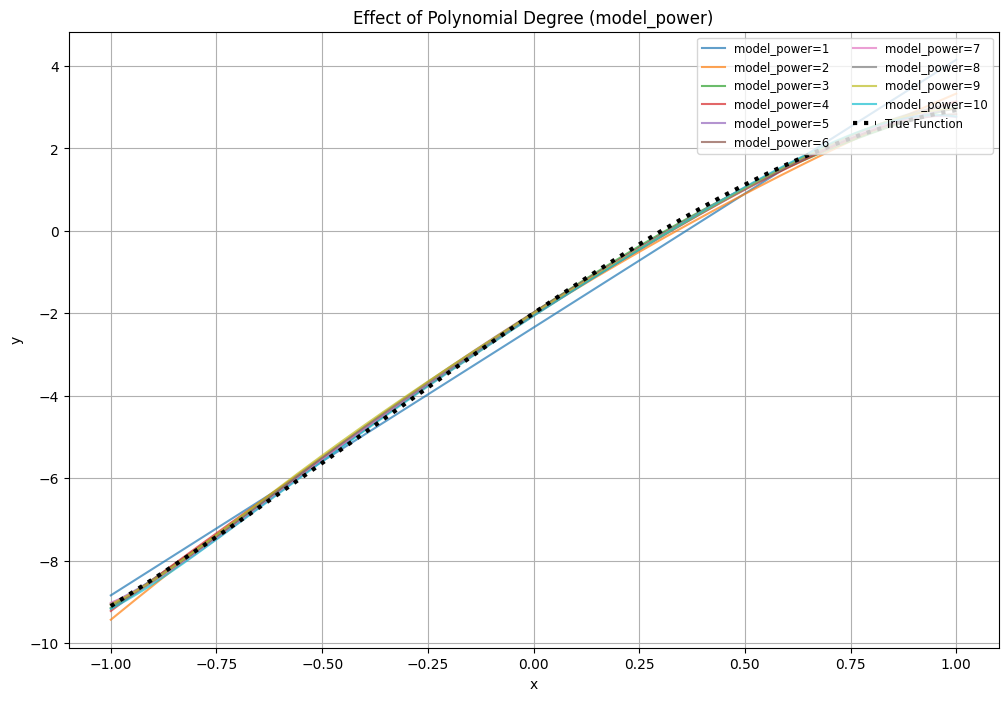

In [19]:
#PLAYING AROUND MODEL POWER
# Parameters for Question 3
model_power_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
m = 50  # Fixed number of training points
sigma_eps = 0.1  # Fixed noise variance
alpha = 0.1  # Fixed regularization

# Generate test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_true = f(x_test).flatten()

# Initialize plot
plt.figure(figsize=(12, 8))

# Iterate over model_power values
for model_power in model_power_values:
    # Generate training data
    X_train = np.random.uniform(-1, 1, (m, 1))
    eps_train = np.random.normal(0, sigma_eps, (m, 1))
    y_train = f(X_train).flatten() + eps_train.flatten()

    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Plot predictions with varied line styles and alpha
    plt.plot(x_test[:, 0], y_pred, label=f"model_power={model_power}", alpha=0.7)

# Plot the true function
plt.plot(x_test[:, 0], y_true, label="True Function", color="black", linewidth=3, linestyle=":")

# Finalize plot
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.title("Effect of Polynomial Degree (model_power)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


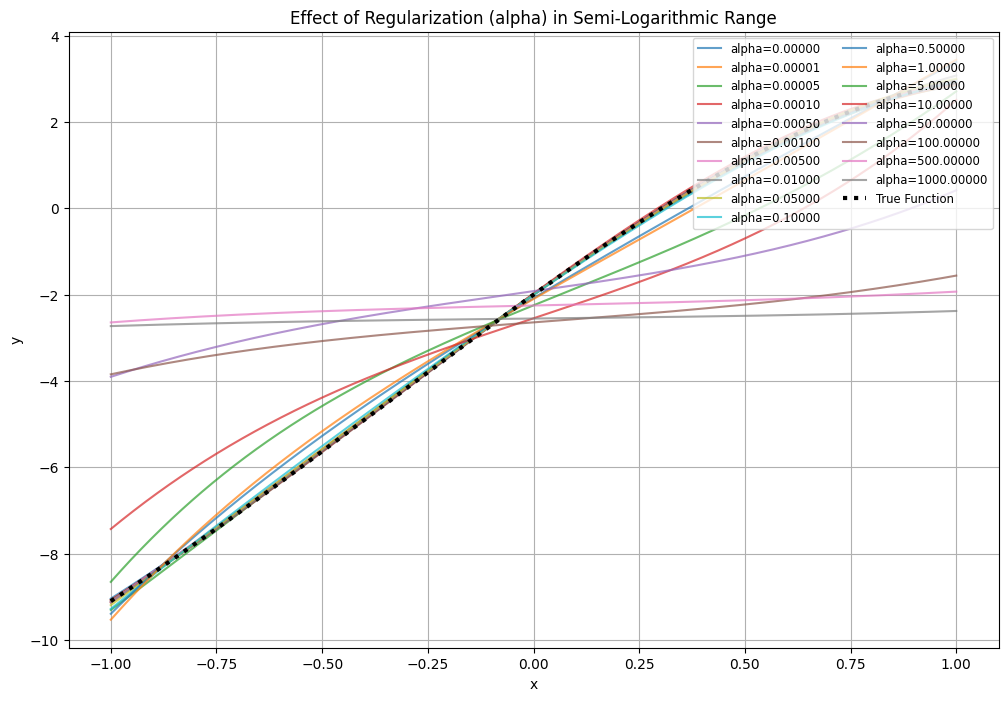

In [20]:
#Editing Alpha Values
# Parameters for Question 4 with updated alpha values
alpha_values = [0.0, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
m = 50  # Fixed number of training points
sigma_eps = 0.1  # Fixed noise variance
model_power = 4  # Fixed polynomial degree

# Generate test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_true = f(x_test).flatten()

# Initialize plot
plt.figure(figsize=(12, 8))

# Iterate over alpha values
for alpha in alpha_values:
    # Generate training data
    X_train = np.random.uniform(-1, 1, (m, 1))
    eps_train = np.random.normal(0, sigma_eps, (m, 1))
    y_train = f(X_train).flatten() + eps_train.flatten()

    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Plot predictions with varied colors and opacity
    plt.plot(x_test[:, 0], y_pred, label=f"alpha={alpha:.5f}", alpha=0.7)

# Plot the true function
plt.plot(x_test[:, 0], y_true, label="True Function", color="black", linewidth=3, linestyle=":")

# Finalize plot
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.title("Effect of Regularization (alpha) in Semi-Logarithmic Range")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


In [23]:

# Parameters
model_power_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Degrees to test
alpha_values = [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]  # Regularization values to test
num_trials = 15  # Number of trials for variance and bias estimation
m = 50  # Number of training points
sigma_eps = 0.1  # Fixed noise variance
m_prime = 10000  # Large dataset for evaluation

# Generate training and test data
X_prime = np.random.uniform(-1, 1, (m_prime, 1))
eps_prime = np.random.normal(0, sigma_eps, (m_prime, 1))
y_prime_t = f(X_prime).flatten()

# Initialize storage for results
results = []

# Iterate over model_power and alpha
for model_power in model_power_values:
    for alpha in alpha_values:
        # Initialize storage for bias and variance for current config
        biases = []
        variances = []

        # Trials for bias and variance estimation
        for trial in range(num_trials):
            # Generate training data
            X_train = np.random.uniform(-1, 1, (m, 1))
            eps_train = np.random.normal(0, sigma_eps, (m, 1))
            y_train = f(X_train).flatten() + eps_train.flatten()

            # Fit model
            model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
            model.fit(X_train, y_train)

            # Predict on evaluation data
            y_pred_prime = model.predict(X_prime)
            biases.append(np.abs(y_pred_prime.mean() - y_prime_t.mean()))
            variances.append(y_pred_prime.var())

        # Store average bias and variance
        bias_mean = np.mean(biases)
        variance_mean = np.mean(variances)
        results.append((model_power, alpha, bias_mean, variance_mean))
print(f"Model Power: {model_power}, Alpha: {alpha:.5f}, Bias: {bias_mean:.4f}, Variance: {variance_mean:.4f}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['model_power', 'alpha', 'bias', 'variance'])

# Plotting the bias-variance tradeoff
fig = px.scatter(
    results_df,
    x="bias",
    y="variance",
    color="model_power",
    size="alpha",
    title="Bias-Variance Tradeoff for Different model_power and alpha",
    labels={"model_power": "Degree", "alpha": "Regularization"},
)
fig.show()


Model Power: 10, Alpha: 100.00000, Bias: 0.3556, Variance: 0.6128


In [11]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import Latex, Math

model_power = 4 ##this
alpha = 0. ##this

poly = PolynomialFeatures(degree=model_power)
y_hat_prime_trials = np.nan * np.ones((m_prime, 1, num_trials))

models = []
for i in range(num_trials):
  model_temp = Ridge(alpha=alpha)
  model_temp.fit(poly.fit_transform(X_trials[:, :, i]), y_trials[:, 0, i])
  y_hat_prime_trials[:, 0, i] = model_temp.predict(poly.transform(X_prime))
  models.append(model_temp)

biases_hat = np.abs(y_hat_prime_trials.mean(axis=2) - y_prime_t)
variances_hat = y_hat_prime_trials.var(axis=2)

bias_hat_mean = biases_hat.mean()
variance_hat_mean = variances_hat.mean()

display(Math(r'\text{{Average Estimated Bias: }}{}'.format(bias_hat_mean)))
display(Math(r'\text{{Average Estimated Variance: }}{}'.format(variance_hat_mean)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We can now, visualize the resulting models as well. You can change the range of visualization by uncommenting and changing the values in the commented line:

In [12]:
import pandas as pd

m_vis = 101

min_x0_vis = np.minimum(X_trials[:, 0, :].min(), X_prime[:, 0].min())
max_x0_vis = np.maximum(X_trials[:, 0, :].max(), X_prime[:, 0].max())

# (min_x0_vis, max_x0_vis) = (-1., 1.) ##optional

x0_vis = np.linspace(min_x0_vis, max_x0_vis, m_vis)
X_vis = x0_vis[:, None]
y_t_vis = f(X_vis)
df = pd.DataFrame(np.c_[X_vis[:, 0], y_t_vis[:, 0], -1 * np.ones((m_vis,))], columns=['x', 'y', 'model'])
df['model'].replace(-1, 'reality', inplace=True)

y_hat_vis_trials = np.nan * np.ones((m_vis, 1, num_trials))
for i in range(num_trials):
  y_hat_vis_trials[:, 0, i] = models[i].predict(poly.transform(X_vis))
  df_temp = pd.DataFrame(np.c_[X_vis[:, 0], y_hat_vis_trials[:, 0, i], i * np.ones((m_vis,))], columns=['x', 'y', 'model'])
  df_temp['model'].replace(i, 'model ' + str(i), inplace=True)
  df = pd.concat([df, df_temp])
df.reset_index(inplace=True)

fig = px.line(df, x='x', y='y', color='model')
fig.show()

<ipython-input-12-fb560ec47aa5>:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-12-fb560ec47aa5>:20: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

First, be careful about the ranges of values and study them in graphs!

Now, go back and change values, one by one, observing the effect of changing each of them on the average bias and variance estimates and the graphs. Record your observations for changing `m`, `sigma_eps`, `model_power` and `alpha`. Try to change values in a wide range and observe the effects for a couple of different choices of `f`. You are required to only study the pairwise combination of `f` and other factors and not combinations of other factors among themselves, but you can do that if you like and it will be a very good learning experience.

Also optionally, you can change `sigma_X`, `dist_X`, `dist_eps`, `num_trails` and `m_prime` and see what changes.

You can change `min_x0_vis` and `max_x0_vis` to change the boundaries of the graph visualization as well.

Remember to record your observations in the worksheet document accompanying this notebook.

In [24]:
#Complex Fn
def f(X):
    x = X[:, 0]
    f = (8 * np.sin(3 * np.pi * x)) + (3 * x**4) - (2 * np.exp(0.5 * x)) + (5 * np.cos(2 * x))
    return f[:, None]


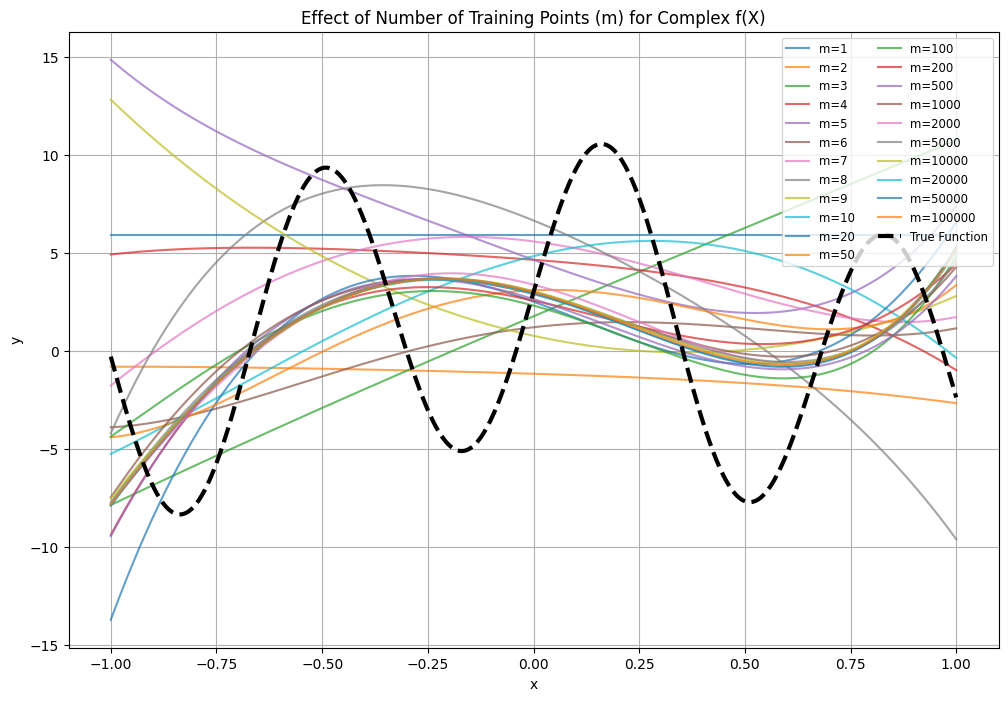

In [25]:
# Parameters
m_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
sigma_eps = 0.1  # Fixed noise variance
model_power = 4  # Fixed polynomial degree
alpha = 0.1  # Fixed regularization

# Generate test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_true = f(x_test).flatten()

# Initialize plot
plt.figure(figsize=(12, 8))

# Iterate over m values
for m in m_values:
    # Generate training data
    X_train = np.random.uniform(-1, 1, (m, 1))
    eps_train = np.random.normal(0, sigma_eps, (m, 1))
    y_train = f(X_train).flatten() + eps_train.flatten()

    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Plot predictions with varied colors and alpha
    plt.plot(x_test[:, 0], y_pred, label=f"m={m}", alpha=0.7)

# Plot the true function
plt.plot(x_test[:, 0], y_true, label="True Function", color="black", linewidth=3, linestyle="--")

# Finalize plot
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.title("Effect of Number of Training Points (m) for Complex f(X)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


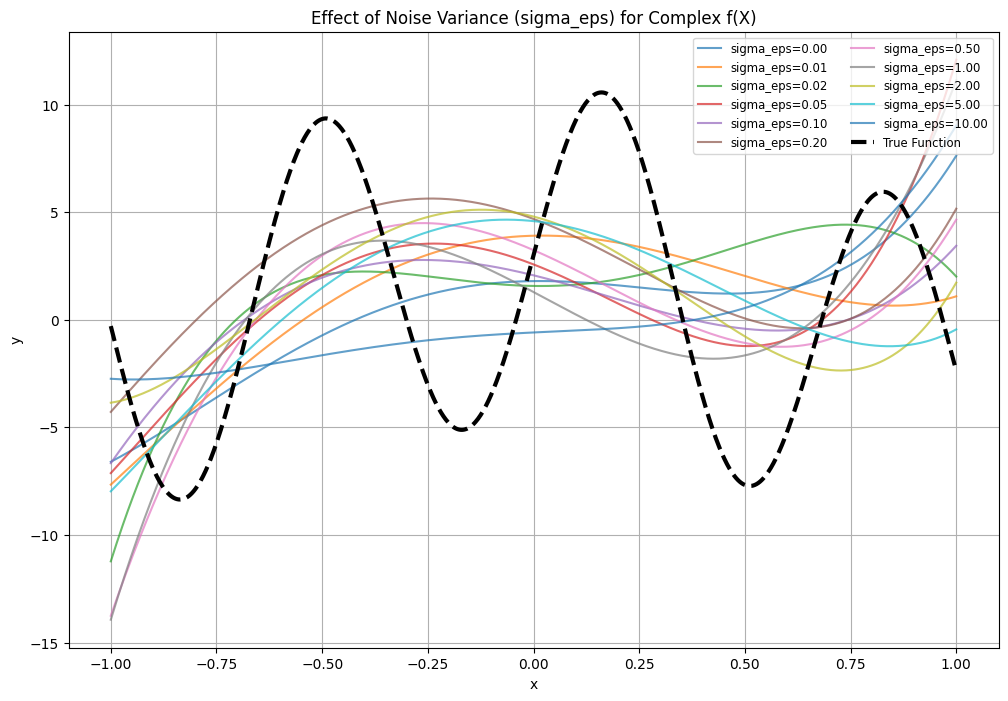

In [26]:
# Parameters for Question 2
sigma_eps_values = [0.0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
m = 50  # Fixed number of training points
model_power = 4  # Fixed polynomial degree
alpha = 0.1  # Fixed regularization

# Generate test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_true = f(x_test).flatten()

# Initialize plot
plt.figure(figsize=(12, 8))

# Iterate over sigma_eps values
for sigma_eps in sigma_eps_values:
    # Generate training data
    X_train = np.random.uniform(-1, 1, (m, 1))
    eps_train = np.random.normal(0, sigma_eps, (m, 1))
    y_train = f(X_train).flatten() + eps_train.flatten()

    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Plot predictions with varied colors and alpha
    plt.plot(x_test[:, 0], y_pred, label=f"sigma_eps={sigma_eps:.2f}", alpha=0.7)

# Plot the true function
plt.plot(x_test[:, 0], y_true, label="True Function", color="black", linewidth=3, linestyle="--")

# Finalize plot
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.title("Effect of Noise Variance (sigma_eps) for Complex f(X)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


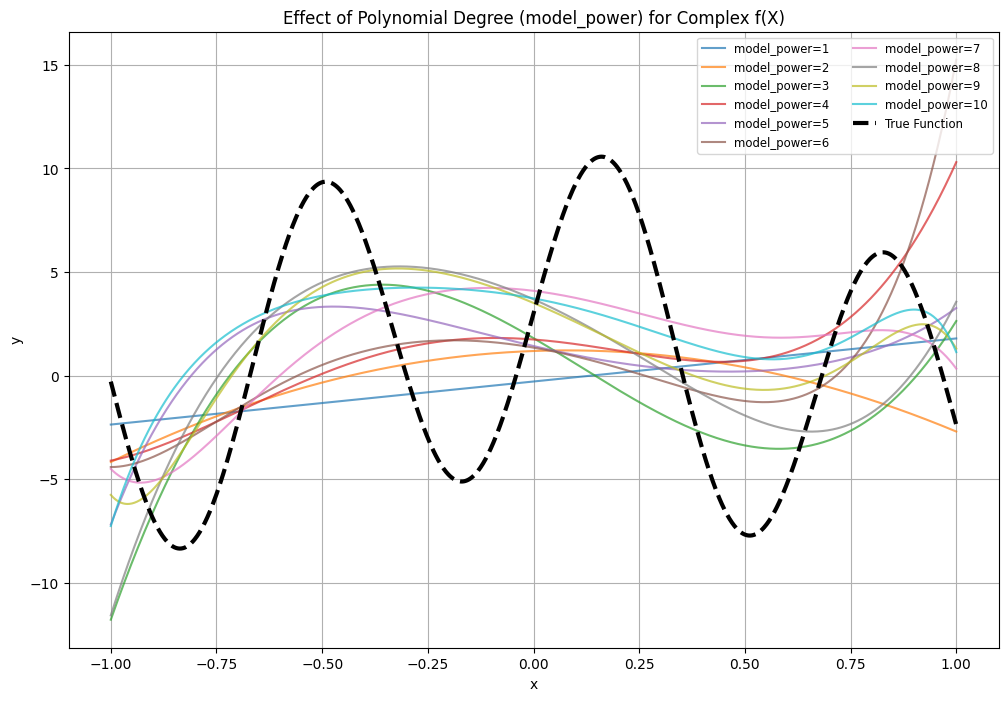

In [27]:
# Parameters for Question 3
model_power_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
m = 50  # Fixed number of training points
sigma_eps = 0.1  # Fixed noise variance
alpha = 0.1  # Fixed regularization

# Generate test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_true = f(x_test).flatten()

# Initialize plot
plt.figure(figsize=(12, 8))

# Iterate over model_power values
for model_power in model_power_values:
    # Generate training data
    X_train = np.random.uniform(-1, 1, (m, 1))
    eps_train = np.random.normal(0, sigma_eps, (m, 1))
    y_train = f(X_train).flatten() + eps_train.flatten()

    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Plot predictions with varied colors and alpha
    plt.plot(x_test[:, 0], y_pred, label=f"model_power={model_power}", alpha=0.7)

# Plot the true function
plt.plot(x_test[:, 0], y_true, label="True Function", color="black", linewidth=3, linestyle="--")

# Finalize plot
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.title("Effect of Polynomial Degree (model_power) for Complex f(X)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()



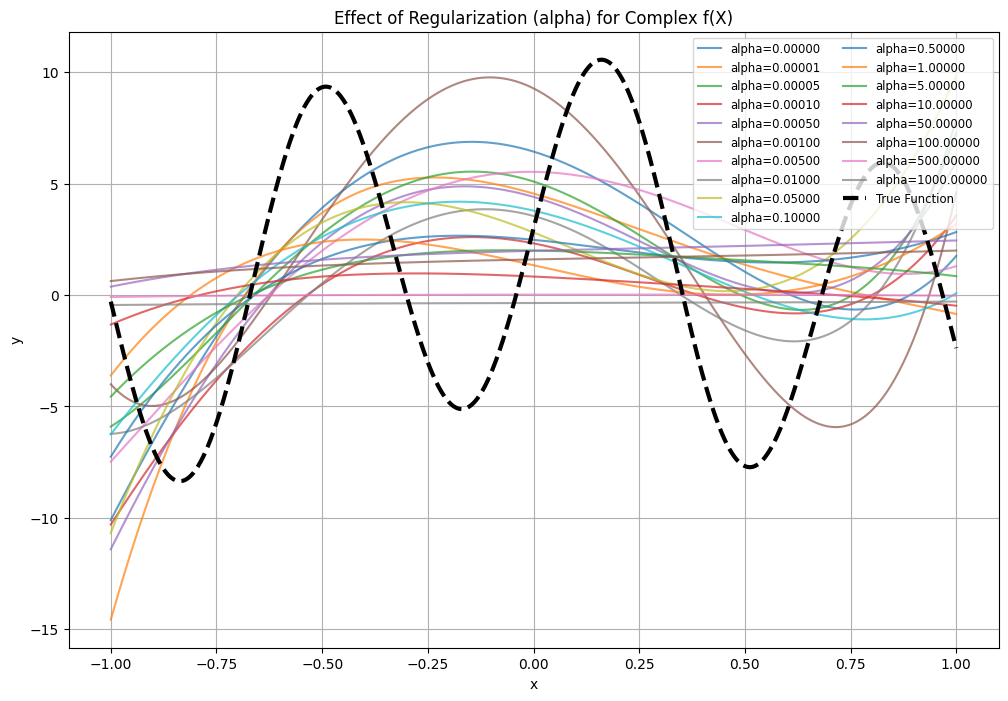

In [28]:
# Parameters for Question 4 with updated alpha values
alpha_values = [0.0, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
m = 50  # Fixed number of training points
sigma_eps = 0.1  # Fixed noise variance
model_power = 4  # Fixed polynomial degree

# Generate test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_true = f(x_test).flatten()

# Initialize plot
plt.figure(figsize=(12, 8))

# Iterate over alpha values
for alpha in alpha_values:
    # Generate training data
    X_train = np.random.uniform(-1, 1, (m, 1))
    eps_train = np.random.normal(0, sigma_eps, (m, 1))
    y_train = f(X_train).flatten() + eps_train.flatten()

    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Plot predictions with varied colors and alpha
    plt.plot(x_test[:, 0], y_pred, label=f"alpha={alpha:.5f}", alpha=0.7)

# Plot the true function
plt.plot(x_test[:, 0], y_true, label="True Function", color="black", linewidth=3, linestyle="--")

# Finalize plot
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.title("Effect of Regularization (alpha) for Complex f(X)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


In [29]:
#Simpler function
def f(X):
    x = X[:, 0]
    f = 4 * x - x**2 + 1
    return f[:, None]


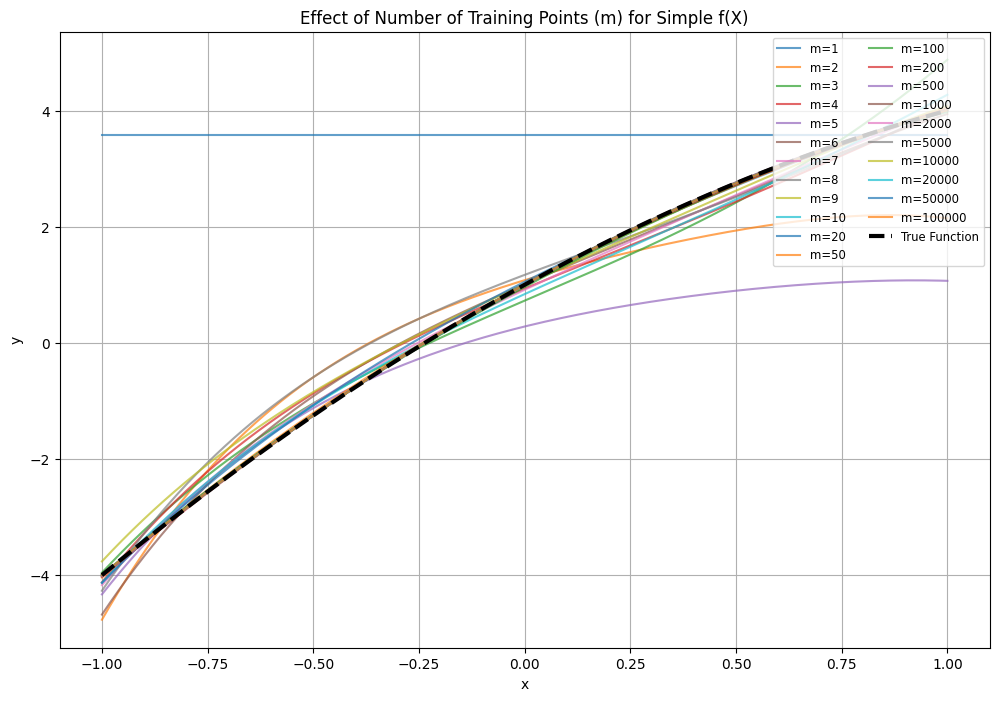

In [30]:
# Parameters
m_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
sigma_eps = 0.1  # Fixed noise variance
model_power = 4  # Fixed polynomial degree
alpha = 0.1  # Fixed regularization

# Generate test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_true = f(x_test).flatten()

# Initialize plot
plt.figure(figsize=(12, 8))

# Iterate over m values
for m in m_values:
    # Generate training data
    X_train = np.random.uniform(-1, 1, (m, 1))
    eps_train = np.random.normal(0, sigma_eps, (m, 1))
    y_train = f(X_train).flatten() + eps_train.flatten()

    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Plot predictions with varied colors and alpha
    plt.plot(x_test[:, 0], y_pred, label=f"m={m}", alpha=0.7)

# Plot the true function
plt.plot(x_test[:, 0], y_true, label="True Function", color="black", linewidth=3, linestyle="--")

# Finalize plot
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.title("Effect of Number of Training Points (m) for Simple f(X)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


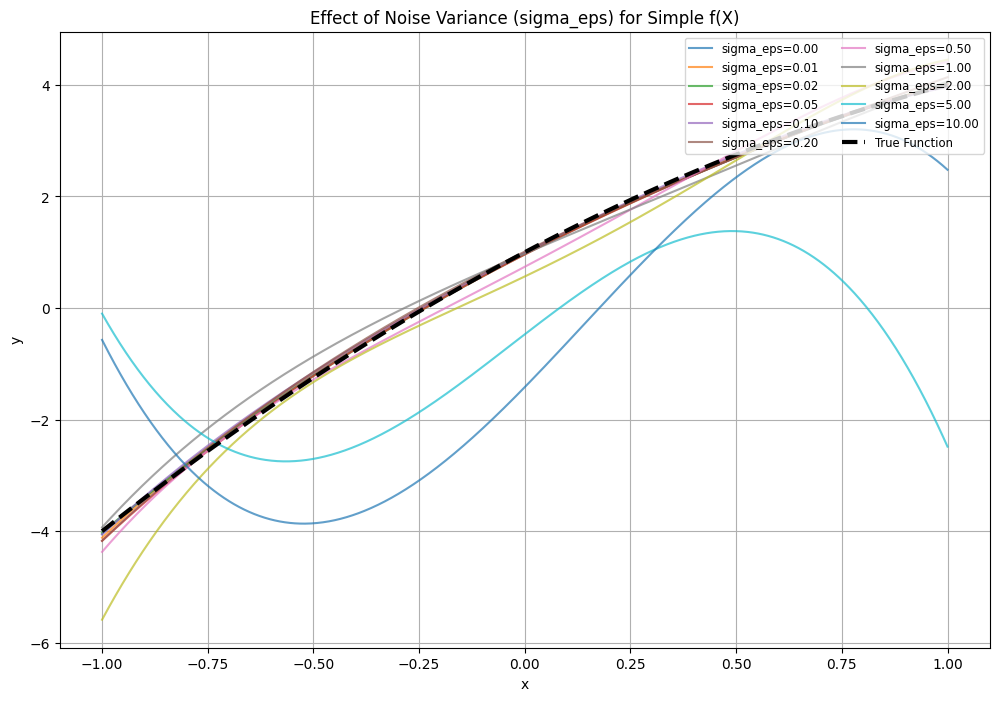

In [31]:
# Parameters for Question 2
sigma_eps_values = [0.0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
m = 50  # Fixed number of training points
model_power = 4  # Fixed polynomial degree
alpha = 0.1  # Fixed regularization

# Generate test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_true = f(x_test).flatten()

# Initialize plot
plt.figure(figsize=(12, 8))

# Iterate over sigma_eps values
for sigma_eps in sigma_eps_values:
    # Generate training data
    X_train = np.random.uniform(-1, 1, (m, 1))
    eps_train = np.random.normal(0, sigma_eps, (m, 1))
    y_train = f(X_train).flatten() + eps_train.flatten()

    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Plot predictions with varied colors and alpha
    plt.plot(x_test[:, 0], y_pred, label=f"sigma_eps={sigma_eps:.2f}", alpha=0.7)

# Plot the true function
plt.plot(x_test[:, 0], y_true, label="True Function", color="black", linewidth=3, linestyle="--")

# Finalize plot
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.title("Effect of Noise Variance (sigma_eps) for Simple f(X)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


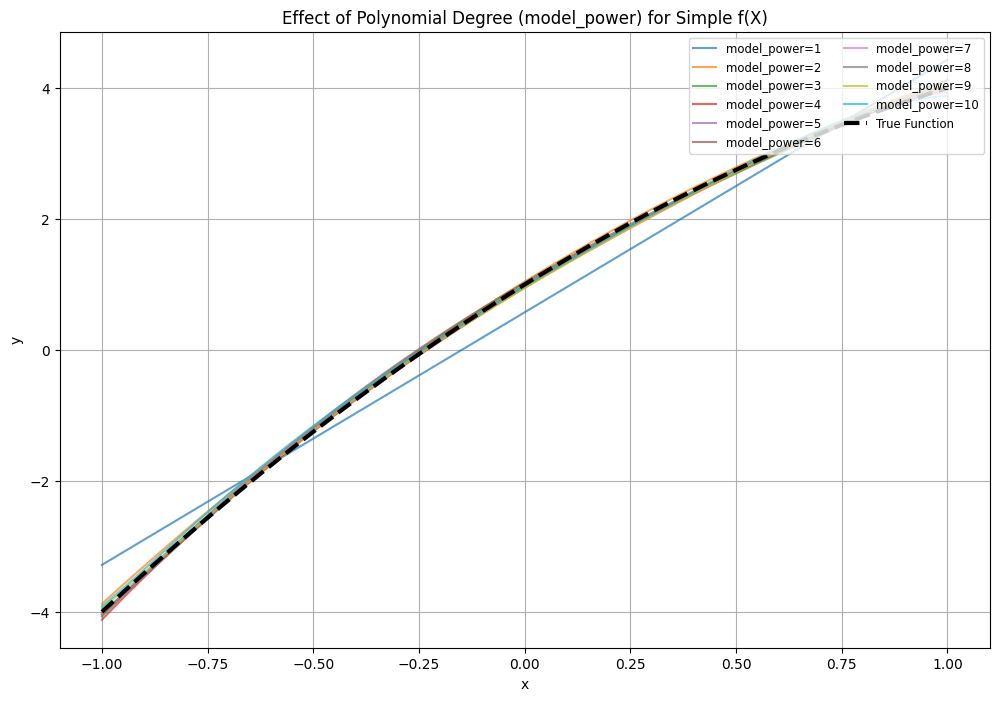

In [32]:
# Parameters for Question 3
model_power_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
m = 50  # Fixed number of training points
sigma_eps = 0.1  # Fixed noise variance
alpha = 0.1  # Fixed regularization

# Generate test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_true = f(x_test).flatten()

# Initialize plot
plt.figure(figsize=(12, 8))

# Iterate over model_power values
for model_power in model_power_values:
    # Generate training data
    X_train = np.random.uniform(-1, 1, (m, 1))
    eps_train = np.random.normal(0, sigma_eps, (m, 1))
    y_train = f(X_train).flatten() + eps_train.flatten()

    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Plot predictions with varied colors and alpha
    plt.plot(x_test[:, 0], y_pred, label=f"model_power={model_power}", alpha=0.7)

# Plot the true function
plt.plot(x_test[:, 0], y_true, label="True Function", color="black", linewidth=3, linestyle="--")

# Finalize plot
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.title("Effect of Polynomial Degree (model_power) for Simple f(X)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


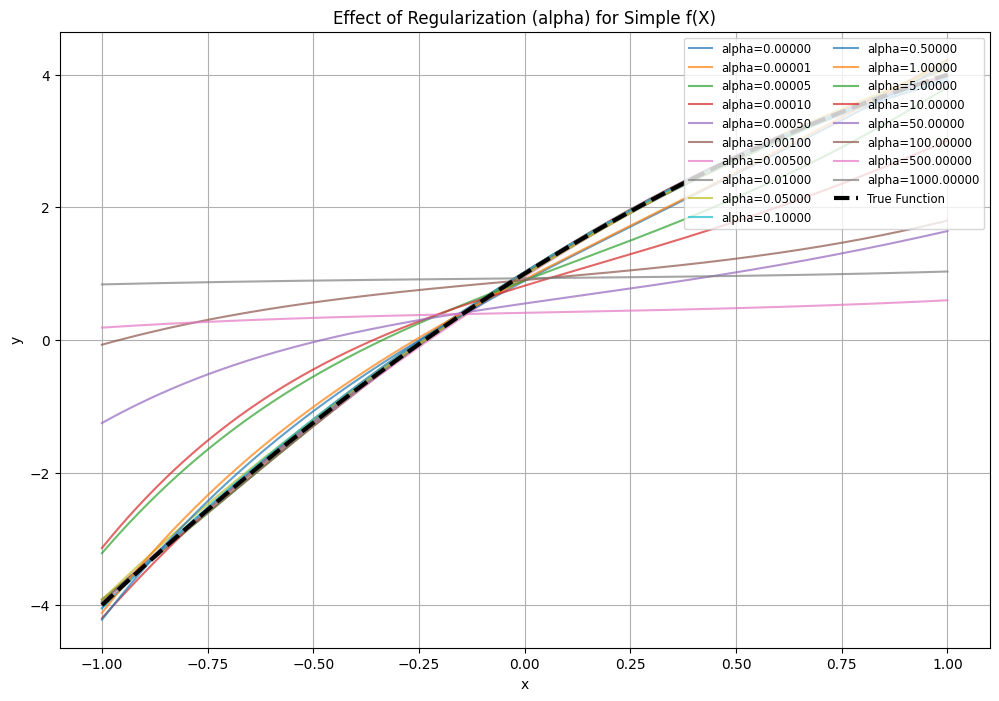

In [33]:
# Parameters for Question 4 with updated alpha values
alpha_values = [0.0, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
m = 50  # Fixed number of training points
sigma_eps = 0.1  # Fixed noise variance
model_power = 4  # Fixed polynomial degree

# Generate test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_true = f(x_test).flatten()

# Initialize plot
plt.figure(figsize=(12, 8))

# Iterate over alpha values
for alpha in alpha_values:
    # Generate training data
    X_train = np.random.uniform(-1, 1, (m, 1))
    eps_train = np.random.normal(0, sigma_eps, (m, 1))
    y_train = f(X_train).flatten() + eps_train.flatten()

    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(model_power), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(x_test)

    # Plot predictions with varied colors and alpha
    plt.plot(x_test[:, 0], y_pred, label=f"alpha={alpha:.5f}", alpha=0.7)

# Plot the true function
plt.plot(x_test[:, 0], y_true, label="True Function", color="black", linewidth=3, linestyle="--")

# Finalize plot
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.title("Effect of Regularization (alpha) for Simple f(X)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


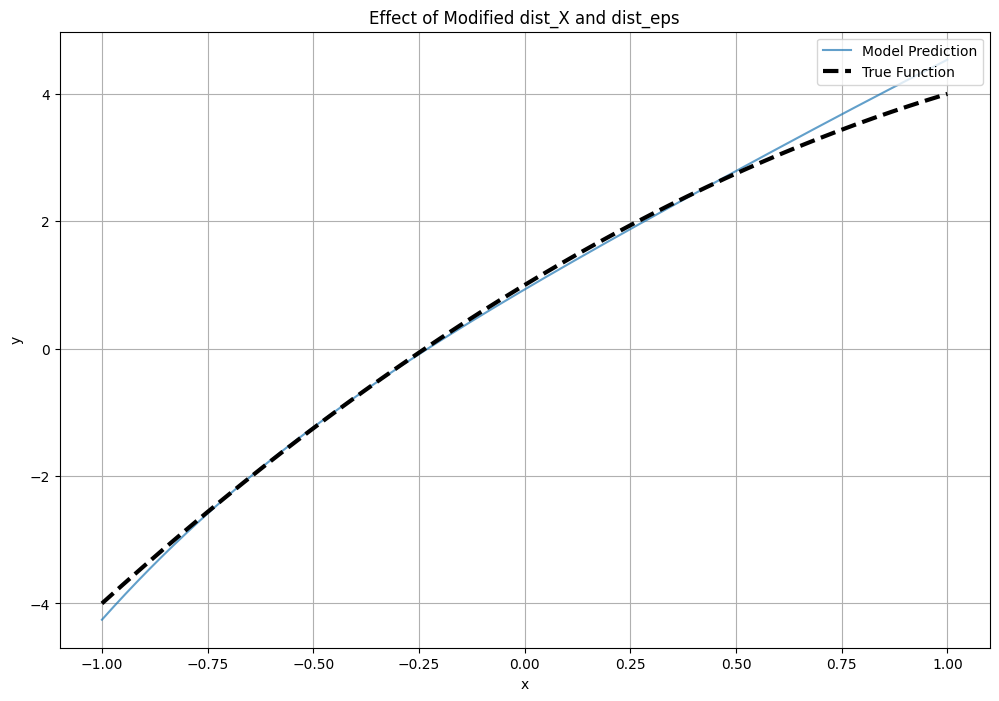

In [34]:
#Optional
# New distributions for dist_X and dist_eps
def dist_X(mean, sigma, size):
    return np.random.uniform(mean - sigma, mean + sigma, size)  # Uniform distribution

def dist_eps(sigma, size):
    return np.random.normal(0, sigma, size)  # Gaussian noise

# Parameters
sigma_X = 0.5  # Reduced feature variance
sigma_eps = 0.2  # Increased noise variance
m = 50  # Fixed number of training points

# Generate training data
X_train = dist_X(0.0, sigma_X, (m, 1))
eps_train = dist_eps(sigma_eps, (m, 1))
y_train = f(X_train).flatten() + eps_train.flatten()

# Create and fit the model
model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0.1))
model.fit(X_train, y_train)

# Predict on test data
x_test = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_pred = model.predict(x_test)

# Plot predictions
plt.figure(figsize=(12, 8))
plt.plot(x_test[:, 0], y_pred, label="Model Prediction", alpha=0.7)
plt.plot(x_test[:, 0], f(x_test).flatten(), label="True Function", color="black", linewidth=3, linestyle="--")
plt.legend(loc="upper right")
plt.title("Effect of Modified dist_X and dist_eps")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


In [35]:
# Parameters
num_trials_values = [10, 50]
m_prime_values = [100, 1000, 10000]

# Iterate over num_trials and m_prime combinations
for num_trials in num_trials_values:
    for m_prime in m_prime_values:
        # Generate evaluation data
        X_prime = np.random.uniform(-1, 1, (m_prime, 1))
        eps_prime = np.random.normal(0, 0.1, (m_prime, 1))
        y_prime_t = f(X_prime).flatten()

        biases = []
        variances = []

        for _ in range(num_trials):
            # Generate training data
            X_train = np.random.uniform(-1, 1, (50, 1))
            eps_train = np.random.normal(0, 0.1, (50, 1))
            y_train = f(X_train).flatten() + eps_train.flatten()

            # Fit model
            model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0.1))
            model.fit(X_train, y_train)

            # Predict on evaluation data
            y_pred_prime = model.predict(X_prime)
            biases.append(np.abs(y_pred_prime.mean() - y_prime_t.mean()))
            variances.append(y_pred_prime.var())

        # Record results
        print(f"Num Trials: {num_trials}, m_prime: {m_prime}, Bias: {np.mean(biases):.4f}, Variance: {np.mean(variances):.4f}")


Num Trials: 10, m_prime: 100, Bias: 0.0116, Variance: 5.5572
Num Trials: 10, m_prime: 1000, Bias: 0.0115, Variance: 5.0845
Num Trials: 10, m_prime: 10000, Bias: 0.0154, Variance: 5.3478
Num Trials: 50, m_prime: 100, Bias: 0.0137, Variance: 4.6362
Num Trials: 50, m_prime: 1000, Bias: 0.0125, Variance: 5.4906
Num Trials: 50, m_prime: 10000, Bias: 0.0128, Variance: 5.4080


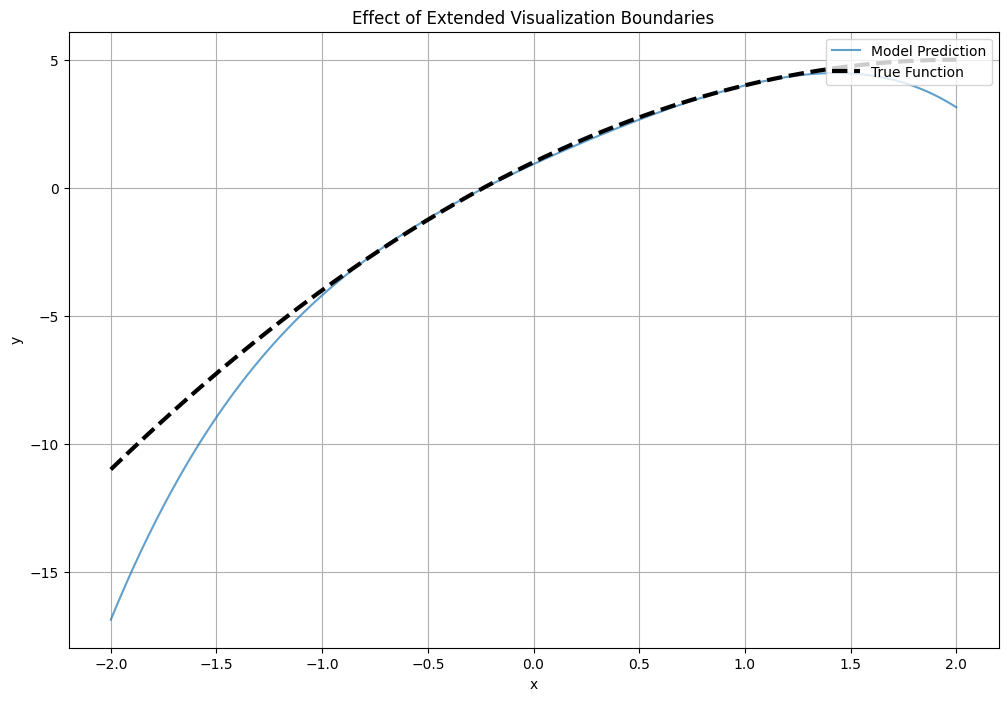

In [36]:
# Adjust visualization boundaries
min_x0_vis = -2  # Extend lower boundary
max_x0_vis = 2   # Extend upper boundary

x_vis = np.linspace(min_x0_vis, max_x0_vis, 1000).reshape(-1, 1)
y_true_vis = f(x_vis).flatten()

# Generate training data
X_train = np.random.uniform(-1, 1, (50, 1))
eps_train = np.random.normal(0, 0.1, (50, 1))
y_train = f(X_train).flatten() + eps_train.flatten()

# Fit model
model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0.1))
model.fit(X_train, y_train)

# Predict on visualization data
y_pred_vis = model.predict(x_vis)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(x_vis[:, 0], y_pred_vis, label="Model Prediction", alpha=0.7)
plt.plot(x_vis[:, 0], y_true_vis, label="True Function", color="black", linewidth=3, linestyle="--")
plt.legend(loc="upper right")
plt.title("Effect of Extended Visualization Boundaries")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
